<a href="https://colab.research.google.com/github/MariiaSam/data_science/blob/main/Students_15/10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



 https://www.kaggle.com/datasets/rabieelkharoua/students-performance-dataset



About this file

Add Suggestion
Student ID

StudentID: A unique identifier assigned to each student (1001 to 3392).
Demographic Details

Age: The age of the students ranges from 15 to 18 years.

Gender: Gender of the students, where 0 represents Male and 1 represents
Female.

Ethnicity: The ethnicity of the students, coded as follows:

0: Caucasian

1: African American

2: Asian

3: Other

ParentalEducation: The education level of the parents, coded as follows:
0: None

1: High School

2: Some College

3: Bachelor's

4: Higher
Study Habits
StudyTimeWeekly: Weekly study time in hours, ranging from 0 to 20.
Absences: Number of absences during the school year, ranging from 0 to 30.
Tutoring: Tutoring status, where 0 indicates No and 1 indicates Yes.
Parental Involvement
ParentalSupport: The level of parental support, coded as follows:
0: None
1: Low
2: Moderate
3: High
4: Very High
Extracurricular Activities
Extracurricular: Participation in extracurricular activities, where 0 indicates No and 1 indicates Yes.
Sports: Participation in sports, where 0 indicates No and 1 indicates Yes.
Music: Participation in music activities, where 0 indicates No and 1 indicates Yes.
Volunteering: Participation in volunteering, where 0 indicates No and 1 indicates Yes.
Academic Performance
GPA: Grade Point Average on a scale from 2.0 to 4.0, influenced by study habits, parental involvement, and extracurricular activities.
Target Variable: Grade Class
GradeClass: Classification of students' grades based on GPA:
0: 'A' (GPA >= 3.5)
1: 'B' (3.0 <= GPA < 3.5)
2: 'C' (2.5 <= GPA < 3.0)
3: 'D' (2.0 <= GPA < 2.5)
4: 'F' (GPA < 2.0)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report



from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC


In [2]:

uploaded = files.upload()

Saving Student_data (1).csv to Student_data (1).csv


In [3]:
df = pd.read_csv('Student_data (1).csv')
df

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,3388,18,1,0,3,10.680555,2,0,4,1,0,0,0,3.455509,0.0
2388,3389,17,0,0,1,7.583217,4,1,4,0,1,0,0,3.279150,4.0
2389,3390,16,1,0,2,6.805500,20,0,2,0,0,0,1,1.142333,2.0
2390,3391,16,1,1,0,12.416653,17,0,2,0,1,1,0,1.803297,1.0


In [4]:
print("Назви стовпців:")
df.columns

Назви стовпців:


Index(['StudentID', 'Age', 'Gender', 'Ethnicity', 'ParentalEducation',
       'StudyTimeWeekly', 'Absences', 'Tutoring', 'ParentalSupport',
       'Extracurricular', 'Sports', 'Music', 'Volunteering', 'GPA',
       'GradeClass'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


In [6]:
print("\nПеревірка на пропущені значення:")
df.isnull().sum()


Перевірка на пропущені значення:


,0
StudentID,0
Age,0
Gender,0
Ethnicity,0
ParentalEducation,0
StudyTimeWeekly,0
Absences,0
Tutoring,0
ParentalSupport,0
Extracurricular,0


In [7]:
print("\nПеревірка наявності дублікатів:")
df.duplicated().sum()


Перевірка наявності дублікатів:


0

In [ ]:
df.describe()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,2196.500000,16.468645,0.510870,0.877508,1.746237,9.771992,14.541388,0.301421,2.122074,0.383361,0.303512,0.196906,0.157191,1.906186,2.983696
std,690.655244,1.123798,0.499986,1.028476,1.000411,5.652774,8.467417,0.458971,1.122813,0.486307,0.459870,0.397744,0.364057,0.915156,1.233908
min,1001.000000,15.000000,0.000000,0.000000,0.000000,0.001057,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1598.750000,15.000000,0.000000,0.000000,1.000000,5.043079,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.174803,2.000000
50%,2196.500000,16.000000,1.000000,0.000000,2.000000,9.705363,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.893393,4.000000
75%,2794.250000,17.000000,1.000000,2.000000,2.000000,14.408410,22.000000,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,2.622216,4.000000
max,3392.000000,18.000000,1.000000,3.000000,4.000000,19.978094,29.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000


Вивести розподіл ознаки GradeClass

In [8]:
df_gradeClass = df['GradeClass'].value_counts()
df_gradeClass

,count
GradeClass,
4.0,1211
3.0,414
2.0,391
1.0,269
0.0,107


Побудувати кореляційну матрицю.

In [9]:
df_corr = df.corr()
df_corr

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
StudentID,1.000000,-0.042255,-0.014625,-0.012990,-0.002307,0.026976,0.014841,-0.007834,0.003016,-0.003611,-0.020703,-0.005468,0.008011,-0.002697,-0.098500
Age,-0.042255,1.000000,0.044895,-0.028473,0.025099,-0.006800,-0.011511,-0.012076,0.033197,-0.025061,-0.046320,-0.003492,0.013074,0.000275,-0.006250
Gender,-0.014625,0.044895,1.000000,0.016010,0.006771,0.011469,0.021479,-0.031597,0.008065,-0.005964,-0.008897,0.007109,-0.000200,-0.013360,0.022998
Ethnicity,-0.012990,-0.028473,0.016010,1.000000,0.033595,0.007184,-0.025712,-0.017440,0.020922,-0.008927,-0.004484,-0.014627,0.013468,0.027760,-0.023326
ParentalEducation,-0.002307,0.025099,0.006771,0.033595,1.000000,-0.011051,0.036518,-0.017340,-0.017463,0.007479,0.002029,0.039439,0.011960,-0.035854,0.041031
StudyTimeWeekly,0.026976,-0.006800,0.011469,0.007184,-0.011051,1.000000,0.009326,0.028930,0.035800,-0.022860,0.006836,0.007791,-0.016604,0.179275,-0.134131
Absences,0.014841,-0.011511,0.021479,-0.025712,0.036518,0.009326,1.000000,-0.015534,0.002108,0.000360,0.041454,-0.008692,-0.018528,-0.919314,0.728633
Tutoring,-0.007834,-0.012076,-0.031597,-0.017440,-0.017340,0.028930,-0.015534,1.000000,-0.000824,0.004865,0.006278,-0.011385,-0.050898,0.145119,-0.111695
ParentalSupport,0.003016,0.033197,0.008065,0.020922,-0.017463,0.035800,0.002108,-0.000824,1.000000,-0.008381,-0.006176,0.035122,-0.006036,0.190774,-0.136823
Extracurricular,-0.003611,-0.025061,-0.005964,-0.008927,0.007479,-0.022860,0.000360,0.004865,-0.008381,1.000000,-0.011820,-0.014191,-0.007427,0.094078,-0.069733


Вивести кореляцію ознак із GradeClass

In [10]:
corr_gradeClass = df.corr()['GradeClass']
corr_gradeClass

,GradeClass
StudentID,-0.098500
Age,-0.006250
Gender,0.022998
Ethnicity,-0.023326
ParentalEducation,0.041031
StudyTimeWeekly,-0.134131
Absences,0.728633
Tutoring,-0.111695
ParentalSupport,-0.136823
Extracurricular,-0.069733


Проаналізувати успішність в залежності від пропусків

In [11]:
group_absences = df.groupby('Absences')['GPA'].mean().reset_index()
group_absences

,Absences,GPA
0,0,3.401790
1,1,3.254577
2,2,3.082517
3,3,3.092297
4,4,2.971374
5,5,2.801303
6,6,2.757924
7,7,2.618820
8,8,2.515815
9,9,2.526068


Проаналізувати кількість пропусків для кожного класу успішності

In [12]:
mean_absences = df.groupby('GradeClass')['Absences'].mean().reset_index()
mean_absences

,GradeClass,Absences
0,0.0,5.747664
1,1.0,5.312268
2,2.0,7.250639
3,3.0,11.427536
4,4.0,20.786953


Проаналізувати, як вливає підтримка батьків на середній бал студента GPA

In [13]:
mean_support = df.groupby('ParentalSupport')['GPA'].mean().reset_index()
mean_support

,ParentalSupport,GPA
0,0,1.540128
1,1,1.755700
2,2,1.884246
3,3,2.042409
4,4,2.191545


Візуалізація

<ipython-input-14-a9506d781595>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='ParentalSupport', y='GPA', data=mean_support, palette='viridis')


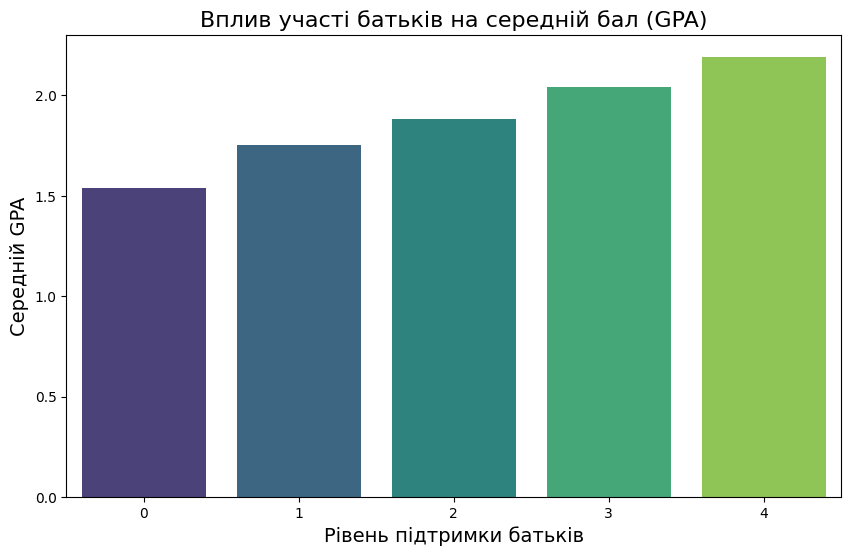

In [14]:
plt.figure(figsize=(10, 6))
sns.barplot(x='ParentalSupport', y='GPA', data=mean_support, palette='viridis')


plt.title('Вплив участі батьків на середній бал (GPA)', fontsize=16)
plt.xlabel('Рівень підтримки батьків', fontsize=14)
plt.ylabel('Середній GPA', fontsize=14)

plt.show()

In [15]:
# Перетворення категоріальних даних у числові (якщо потрібно)
#df = pd.get_dummies(df, drop_first=True)

# Вибір ознак (X) та цільової змінної (y)
X = df.drop('GradeClass', axis=1)
y = df['GradeClass']

# Розділення даних на навчальну та тестову вибірки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Масштабування ознак
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,3388,18,1,0,3,10.680555,2,0,4,1,0,0,0,3.455509
2388,3389,17,0,0,1,7.583217,4,1,4,0,1,0,0,3.279150
2389,3390,16,1,0,2,6.805500,20,0,2,0,0,0,1,1.142333
2390,3391,16,1,1,0,12.416653,17,0,2,0,1,1,0,1.803297


In [16]:
y

,GradeClass
0,2.0
1,1.0
2,4.0
3,3.0
4,4.0
...,...
2387,0.0
2388,4.0
2389,2.0
2390,1.0


In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# scaller = StandardScaler()
# X_train = scaller.fit_transform(X_train)
# X_test = scaller.fit_transform(X_test)

# **Random Forest**

In [17]:
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [18]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train )


RandomForestClassifier(random_state=42)

In [19]:
# GridSearchCV
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=5, n_jobs=-1, verbose=2)


In [20]:
grid_search_rf.fit(X_train, y_train)


Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             verbose=2)

In [21]:
# Найкращі параметри та точність
print("Best parameters for Random Forest:", grid_search_rf.best_params_)
print("Best cross-validation accuracy for Random Forest:", grid_search_rf.best_score_)

# Оцінка на тестовій вибірці
y_pred_rf = grid_search_rf.predict(X_test)
print("Test accuracy for Random Forest:", accuracy_score(y_test, y_pred_rf))


rf_predictions = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)

print("Random Forest Accuracy:", rf_accuracy)
print("Confusion Matrix for Random Forest:")
print(confusion_matrix(y_test, rf_predictions))
print(classification_report(y_test, rf_predictions))

Best parameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best cross-validation accuracy for Random Forest: 0.9210640711932525
Test accuracy for Random Forest: 0.9123173277661796
Random Forest Accuracy: 0.9123173277661796
Confusion Matrix for Random Forest:
[[ 10   5   3   2   2]
 [  0  43   3   1   2]
 [  0   5  74   5   1]
 [  0   2   2  77   5]
 [  1   1   1   1 233]]
              precision    recall  f1-score   support

         0.0       0.91      0.45      0.61        22
         1.0       0.77      0.88      0.82        49
         2.0       0.89      0.87      0.88        85
         3.0       0.90      0.90      0.90        86
         4.0       0.96      0.98      0.97       237

    accuracy                           0.91       479
   macro avg       0.88      0.82      0.83       479
weighted avg       0.91      0.91      0.91       479



# **Logistic Regression**

In [22]:
# Параметри для пошуку
param_grid_lr = {
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}

lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train, y_train )

LogisticRegression(max_iter=1000, random_state=42)

In [23]:
# GridSearchCV
grid_search_lr = GridSearchCV(estimator=lr_model, param_grid=param_grid_lr, cv=5, n_jobs=-1, verbose=2)
grid_search_lr.fit(X_train, y_train)

# Найкращі параметри та точність
print("Best parameters for Logistic Regression:", grid_search_lr.best_params_)
print("Best cross-validation accuracy for Logistic Regression:", grid_search_lr.best_score_)

# Оцінка на тестовій вибірці
y_pred_lr = grid_search_lr.predict(X_test)
print("Test accuracy for Logistic Regression:", accuracy_score(y_test, y_pred_lr))


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters for Logistic Regression: {'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}
Best cross-validation accuracy for Logistic Regression: 0.7710333137396963
Test accuracy for Logistic Regression: 0.7432150313152401


In [ ]:
# rf_predictions = rf_model.predict(X_test)
# rf_accuracy = accuracy_score(y_test, rf_predictions)

# print("Random Forest Accuracy:", rf_accuracy)
# print("Confusion Matrix for Random Forest:")
# print(confusion_matrix(y_test, rf_predictions))
# print(classification_report(y_test, rf_predictions))

In [ ]:
# lr_predictions = lr_model.predict(X_test)
# lr_accuracy = accuracy_score(y_test, lr_predictions)

# print("\nLogistic Regression Accuracy:", lr_accuracy)
# print("Confusion Matrix for Logistic Regression:")
# print(confusion_matrix(y_test, lr_predictions))
# print(classification_report(y_test, lr_predictions))

#**Support Vector Machine (SVM)**

In [24]:
# Параметри для пошуку
param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'linear']
}

# Модель
svm = SVC(random_state=42)

# GridSearchCV
grid_search_svm = GridSearchCV(estimator=svm, param_grid=param_grid_svm, cv=5, n_jobs=-1, verbose=2)
grid_search_svm.fit(X_train, y_train)

# Найкращі параметри та точність
print("Best parameters for SVM:", grid_search_svm.best_params_)
print("Best cross-validation accuracy for SVM:", grid_search_svm.best_score_)

# Оцінка на тестовій вибірці
y_pred_svm = grid_search_svm.predict(X_test)
print("Test accuracy for SVM:", accuracy_score(y_test, y_pred_svm))

Fitting 5 folds for each of 32 candidates, totalling 160 fits
Best parameters for SVM: {'C': 10, 'gamma': 1, 'kernel': 'linear'}
Best cross-validation accuracy for SVM: 0.8557147348707502
Test accuracy for SVM: 0.824634655532359


**Порівняння результатів**

In [25]:
# Виведення точності на тестовій вибірці для кожної моделі
print("Test accuracy for Random Forest:", accuracy_score(y_test, y_pred_rf))
print("Test accuracy for Logistic Regression:", accuracy_score(y_test, y_pred_lr))
print("Test accuracy for SVM:", accuracy_score(y_test, y_pred_svm))

# Виведення звіту про класифікацію для найкращої моделі
print("Classification report for the best model (Random Forest, Logistic Regression, or SVM):")
print(classification_report(y_test, y_pred_rf))  # Або y_pred_lr, або y_pred_svm, залежно від найкращої моделі


Test accuracy for Random Forest: 0.9123173277661796
Test accuracy for Logistic Regression: 0.7432150313152401
Test accuracy for SVM: 0.824634655532359
Classification report for the best model (Random Forest, Logistic Regression, or SVM):
              precision    recall  f1-score   support

         0.0       0.91      0.45      0.61        22
         1.0       0.77      0.88      0.82        49
         2.0       0.89      0.87      0.88        85
         3.0       0.90      0.90      0.90        86
         4.0       0.96      0.98      0.97       237

    accuracy                           0.91       479
   macro avg       0.88      0.82      0.83       479
weighted avg       0.91      0.91      0.91       479



In [26]:
random_indices = np.random.choice(len(X_test), 10, replace=False) # випадкового вибору елементів з заданого масиву
random_predictions = rf_model.predict(X_test[random_indices])
random_predictions

array([1., 4., 4., 4., 4., 2., 3., 4., 2., 2.])

In [27]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

 функції призначені для визначення оптимальної кількості кластерів у задачі кластеризації, використовуючи два відомі методи: метод ліктя (elbow method) та метод силуету (silhouette method). Обидва методи дозволяють оцінити якість кластеризації для різної кількості кластерів та вибрати таке значення, при якому якість кластеризації є найкращою.



**Метод ліктя (elbow method)**


Принцип роботи: Цей метод базується на тому, що зі збільшенням кількості кластерів сума квадратів відстаней від об'єктів до центрів їхніх кластерів (інерція) зменшується. Однак, після певного числа кластерів, зменшення інерції стає менш значним. Точка перегину на графіку інерції від кількості кластерів називається "ліктем" і вказує на оптимальне число кластерів.
Що робить функція:
Перебирає різну кількість кластерів від 1 до 10.
Для кожного числа кластерів будує модель K-means і обчислює інерцію.
Будує графік залежності інерції від кількості кластерів.
Візуально визначає точку перегину (лікоть) на графіку, що відповідає оптимальному числу кластерів.

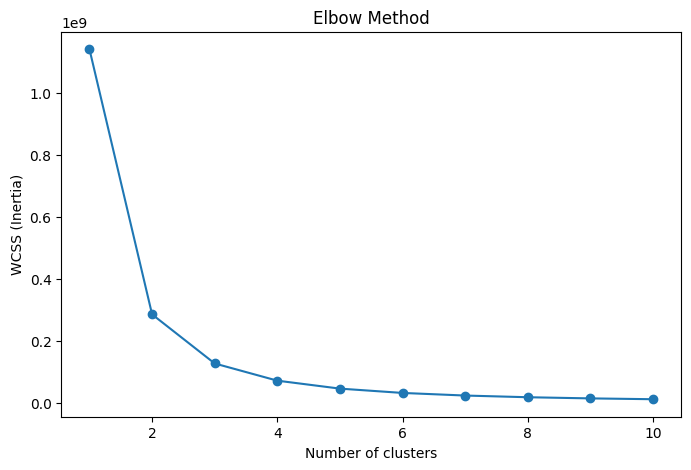

In [30]:
def elbow_method(X):
    wcss = []  # Within-Cluster Sum of Square (інерція)
    for i in range(1, 11):
        kmeans = KMeans(n_clusters=i, random_state=42)
        kmeans.fit(X)
        wcss.append(kmeans.inertia_)  # інерція

    # Графік метода ліктя
    plt.figure(figsize=(8, 5))
    plt.plot(range(1, 11), wcss, marker='o')
    plt.title('Elbow Method')
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS (Inertia)')
    plt.show()
elbow_method(df)

**Метод силуету (silhouette method)**

Принцип роботи: Силуетний коефіцієнт для кожного об'єкта визначає, наскільки він добре класифікований. Значення коефіцієнта лежить в діапазоні від -1 до 1. Чим ближче значення до 1, тим краще об'єкт класифікований.
Що робить функція:
Перебирає різну кількість кластерів від 2 до 10.
Для кожного числа кластерів будує модель K-means і обчислює середній силуетний коефіцієнт для всіх об'єктів.
Будує графік залежності середнього силуетного коефіцієнта від кількості кластерів.
Вибирає число кластерів, при якому середній силуетний коефіцієнт є максимальним.

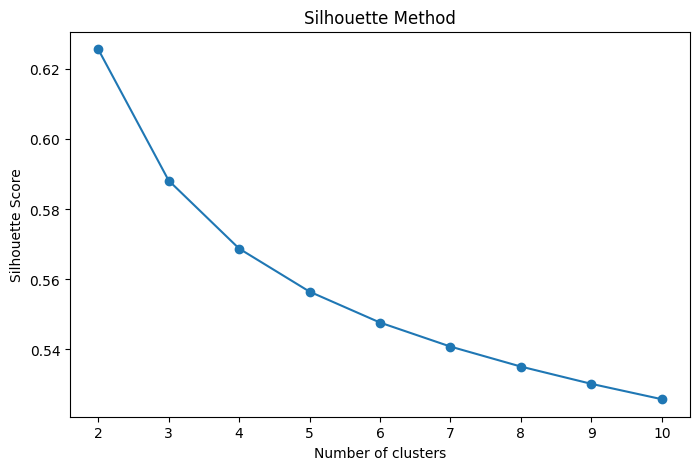

In [29]:

def silhouette_method(X):
    silhouette_scores = []
    for i in range(2, 11):  # Мінімум 2 кластери
        kmeans = KMeans(n_clusters=i, random_state=42)
        labels = kmeans.fit_predict(X)
        silhouette_scores.append(silhouette_score(X, labels))

    # Графік силуетного коефіцієнта
    plt.figure(figsize=(8, 5))
    plt.plot(range(2, 11), silhouette_scores, marker='o')
    plt.title('Silhouette Method')
    plt.xlabel('Number of clusters')
    plt.ylabel('Silhouette Score')
    plt.show()

# Викликаємо  метод для визначення кількості кластерів
silhouette_method(df)

 клас PCA з бібліотеки scikit-learn, який використовується для виконання аналізу головних компонент (PCA)
 Створюється об'єкт класу PCA з параметром n_components=2. Це означає, що ми хочемо зберегти лише 2 найважливіші головні компоненти з наших даних.
 fit: Цей метод навчає модель PCA на даних X. Він обчислює коваріаційну матрицю даних, знаходить власні вектори та власні значення, які відповідають головним компонентам.
transform: Цей метод проектує дані X на новий простір, який розтягнутий вздовж головних компонент. Результатом є новий набір даних X_pca, де кожен зразок представлений двома координатами, що відповідають першим двом головним компонентам.

# Новий розділ

**Метод ліктя**

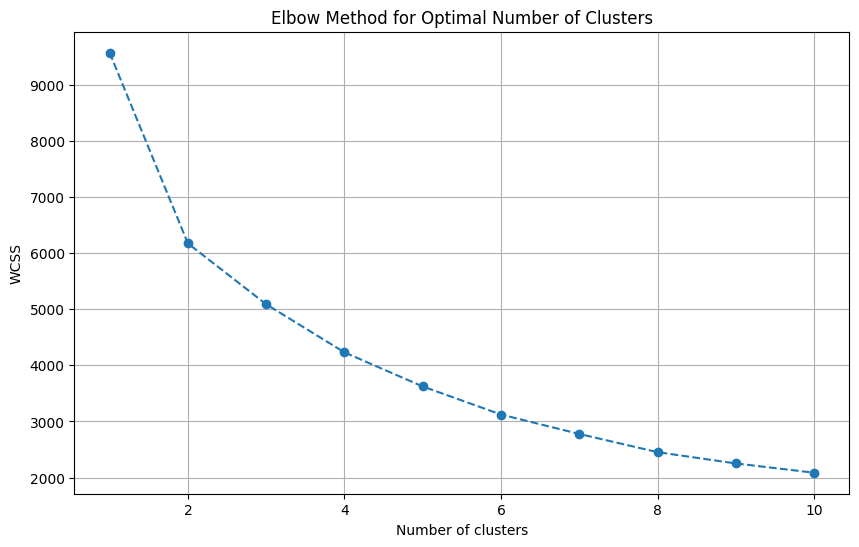

In [31]:
# Вибір числових стовпців для кластеризації
# Вибираємо стовпці, які є числовими і можуть впливати на кластеризацію
features = df[['Age', 'StudyTimeWeekly', 'Absences', 'GPA']]

# Масштабування даних
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

# Застосування ліктевого методу для визначення оптимальної кількості кластерів
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Візуалізація графіка ліктя
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

**Метод силуєтів**

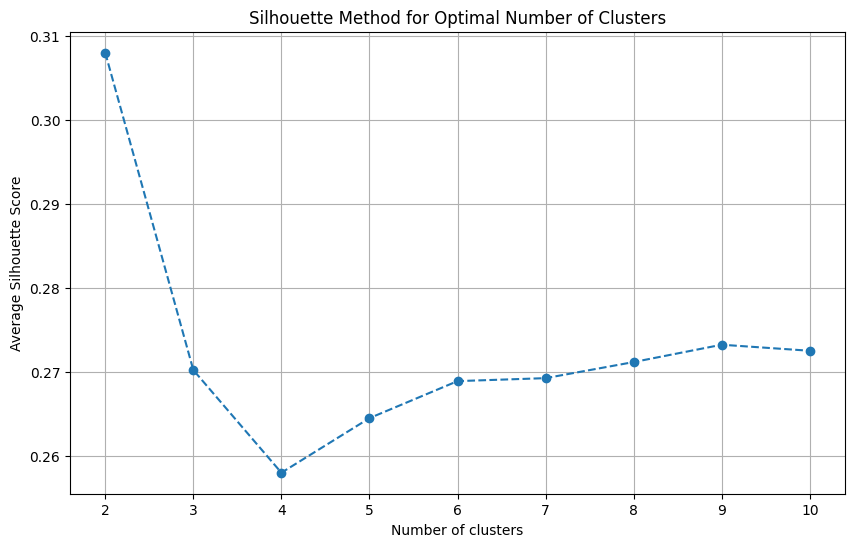

In [32]:
# Застосування методу силуетів для визначення оптимальної кількості кластерів
silhouette_scores = []
for i in range(2, 11):  # Для методу силуетів потрібно мінімум 2 кластери
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    cluster_labels = kmeans.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Візуалізація графіка методу силуетів
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--')
plt.title('Silhouette Method for Optimal Number of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Average Silhouette Score')
plt.grid(True)
plt.show()


**Що таке X_pca:**

X_pca - це новий набір даних, отриманий після застосування PCA до вихідних даних X.
Кожен рядок у X_pca відповідає одному зразку з вихідних даних.
Кожен стовпець у X_pca відповідає одному з головних компонентів.
Оскільки ми вибрали n_components=2, в X_pca буде лише два стовпці.
Для чого використовується PCA:

Зменшення розмірності: Часто дані мають багато ознак, які можуть бути взаємозалежними. PCA дозволяє зменшити кількість ознак, зберігаючи при цьому максимальну кількість інформації. Це може бути корисним для візуалізації даних, пришвидшення алгоритмів машинного навчання та усунення мультиколінеарності.
Виявлення нових ознак: Головні компоненти можуть представляти нові, більш значущі ознаки даних, які можуть бути важко помітити при аналізі вихідних ознак.
Чому ми вибираємо 2 головні компоненти:

Візуалізація: Двовимірний простір легко візуалізувати на графіку.
Спрощення: Зменшення розмірності до двох компонентів значно спрощує подальший аналіз.
Баланс: Два компоненти зазвичай достатньо для того, щоб захопити основну варіативність даних.
Підсумок:
X_pca - це проекція вихідних даних на новий, двовимірний простір, де кожна точка представляє один зразок, а осі відповідають двом найважливішим напрямкам варіативності в даних. Ця проекція дозволяє візуалізувати дані та спростити подальший аналіз.



In [33]:
from sklearn.decomposition import PCA
#Використання PCA для зменшення розмірності

pca = PCA(n_components=2)  # Вибираємо 2 головні компоненти для прикладу
X_pca = pca.fit_transform(X)

X_pca


array([[-1195.49913003,    -7.30101776],
       [-1194.50143275,   -14.31990607],
       [-1193.49899759,    11.75555406],
       ...,
       [ 1193.50034242,     5.26805377],
       [ 1194.5009992 ,     2.25426585],
       [ 1195.50149689,    -1.70567547]])

**Розбираємо код кластеризації KMeans з візуалізацією**

Що робить цей код:

Цей код виконує кластеризацію даних методом KMeans, де задано, що ми хочемо отримати 2 кластери. Далі він візуалізує результати кластеризації на двовимірному графіку, використовуючи перші два головні компоненти (principal components) отримані після застосування методу PCA (Principal Component Analysis).

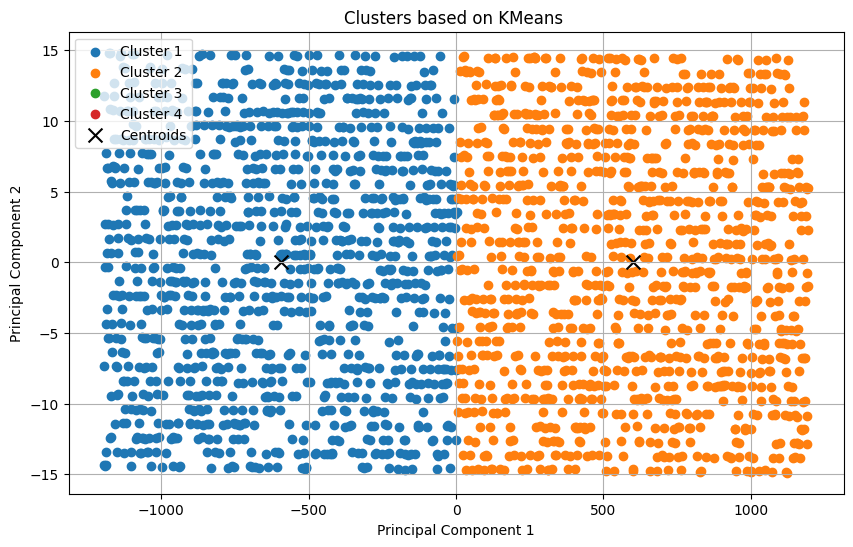

In [34]:
# Кластеризація з KMeans з k = 2 - загальна кількість класів
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_pca)

# Отримання міток кластерів та центроїдів
cluster_labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Візуалізація кластерів
plt.figure(figsize=(10, 6))

# Відокремлення точок для кожного кластера та відображення їх на графіку
for i in range(4):
    plt.scatter(X_pca[cluster_labels == i, 0], X_pca[cluster_labels == i, 1], label=f'Cluster {i+1}')

# Відображення центроїдів
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', color='k', s=100, label='Centroids')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clusters based on KMeans ')
plt.legend()
plt.grid(True)
plt.show()

Кількість кластерів: 1
Кількість шуму: 2392


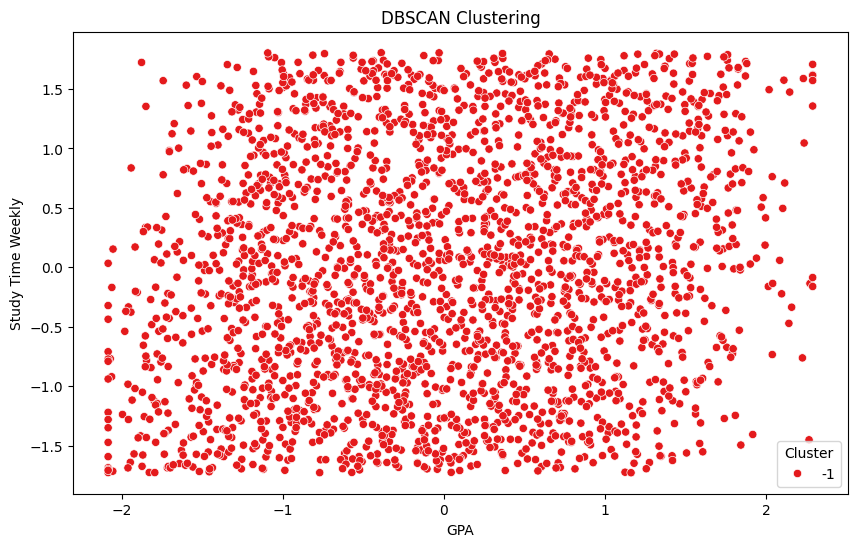

In [35]:
from sklearn.cluster import DBSCAN
import seaborn as sns
from sklearn.preprocessing import StandardScaler

numeric_columns = ['Age', 'StudyTimeWeekly', 'Absences', 'GPA']

scaler = StandardScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
df['Cluster'] = dbscan.fit_predict(df)

# Calculate number of clusters and noise points
n_clusters = len(set(df['Cluster'])) - (1 if -1 in df['Cluster'] else 0)
n_noise = list(df['Cluster']).count(-1)
print(f'Кількість кластерів: {n_clusters}')
print(f'Кількість шуму: {n_noise}')

# Visualization (assuming seaborn is imported)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='GPA', y='StudyTimeWeekly', hue='Cluster', data=df, palette='Set1', legend='full')
plt.title('DBSCAN Clustering')
plt.xlabel('GPA')
plt.ylabel('Study Time Weekly')
plt.show()